Practicing with Credit Card data using a Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import pathlib

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

from IPython.display import clear_output
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os
import matplotlib.pyplot as plt
import math
from datetime import date, datetime

#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [ ]:
dataOriginal = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [ ]:
dataOriginal.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [ ]:
dataOriginal.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0
284806,172792.000,-0.533,-0.190,0.703,-0.506,-0.013,-0.650,1.577,-0.415,0.486,-0.915,-1.040,-0.032,-0.188,-0.084,0.041,-0.303,-0.660,0.167,-0.256,0.383,0.261,0.643,0.377,0.009,-0.474,-0.818,-0.002,0.014,217.000,0


In [ ]:
data = dataOriginal.copy()

In [ ]:
#The number of rows and number of columns in the dataset
data.shape

(284807, 31)

In [ ]:
#Counts of unique values in the target variable
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,-0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,-0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [ ]:
# Showing missing data for dataframe df_train
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# checking for duplicate values
data[data.duplicated()].count()

Time      1081
V1        1081
V2        1081
V3        1081
V4        1081
V5        1081
V6        1081
V7        1081
V8        1081
V9        1081
V10       1081
V11       1081
V12       1081
V13       1081
V14       1081
V15       1081
V16       1081
V17       1081
V18       1081
V19       1081
V20       1081
V21       1081
V22       1081
V23       1081
V24       1081
V25       1081
V26       1081
V27       1081
V28       1081
Amount    1081
Class     1081
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# scaling the data before analysis
scaler = StandardScaler()
subset = data['Amount'].values  ## Complete the code to scale the data
data['Amount'] = scaler.fit_transform(subset.reshape(-1, 1))

In [ ]:
data.drop(['Time'], axis=1, inplace=True)

In [ ]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0.244,0
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,-0.343,0
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,1.159,0
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0.140,0
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,-0.074,0


EDA

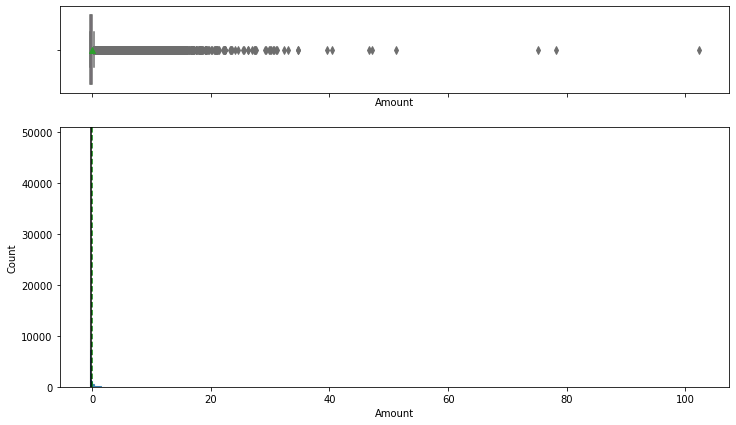

In [ ]:
histogram_boxplot(data, "Amount")

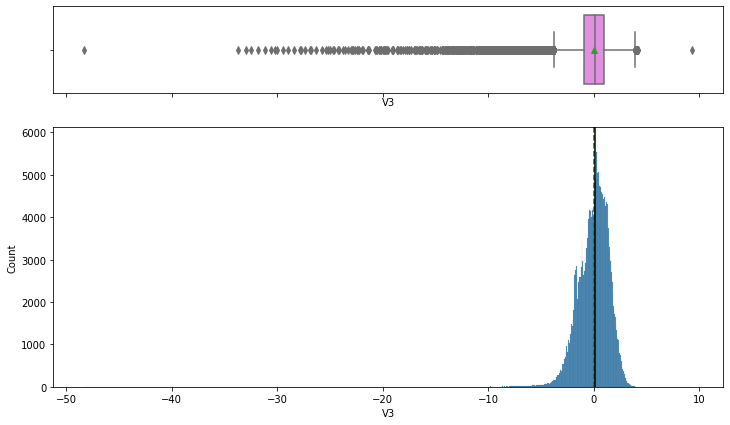

In [ ]:
histogram_boxplot(data, "V3")

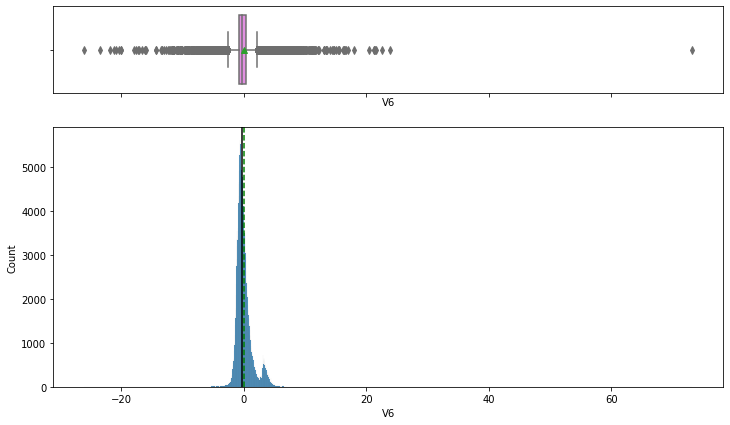

In [ ]:
histogram_boxplot(data, "V6")

Bivariate Analysis

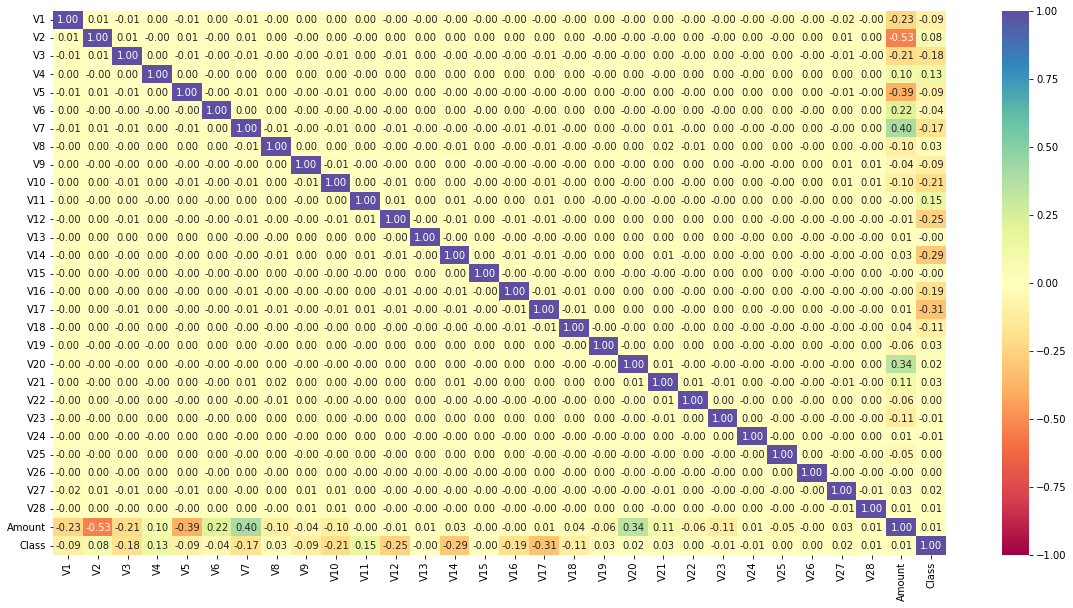

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 10))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)  ## Code to find the correlation between the variables
plt.show()

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

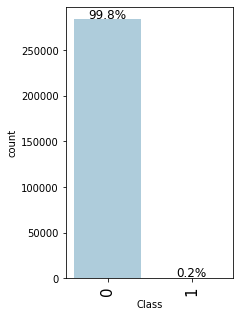

In [ ]:
labeled_barplot(data, "Class", perc=True)

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

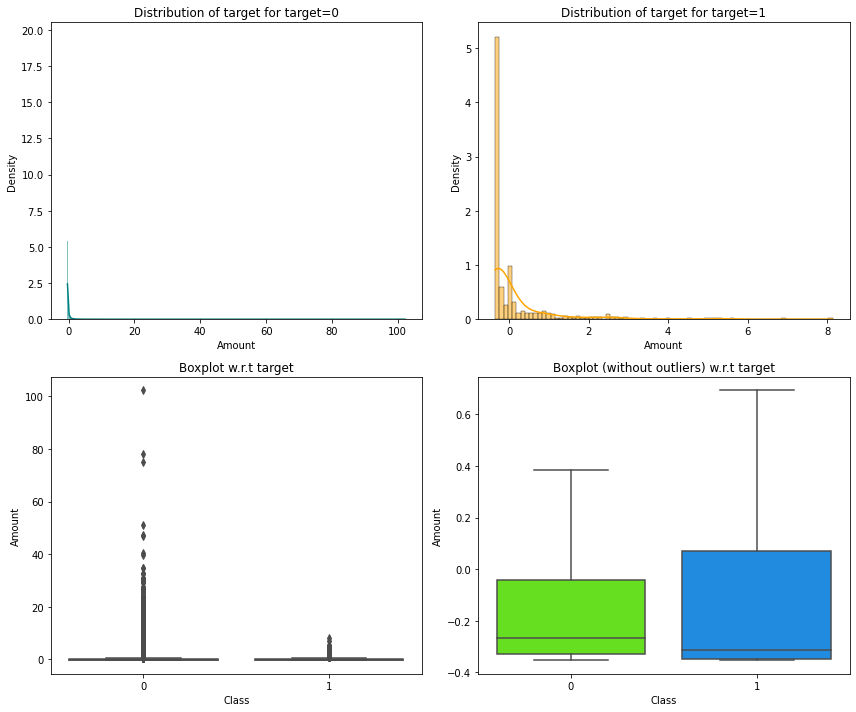

In [ ]:
#stacked_barplot(data, "Amount", "Class")
distribution_plot_wrt_target(data, "Amount", "Class")

In [ ]:
dataCorrect = data.drop(["Class"], axis=1)
dataLabel = data["Class"]


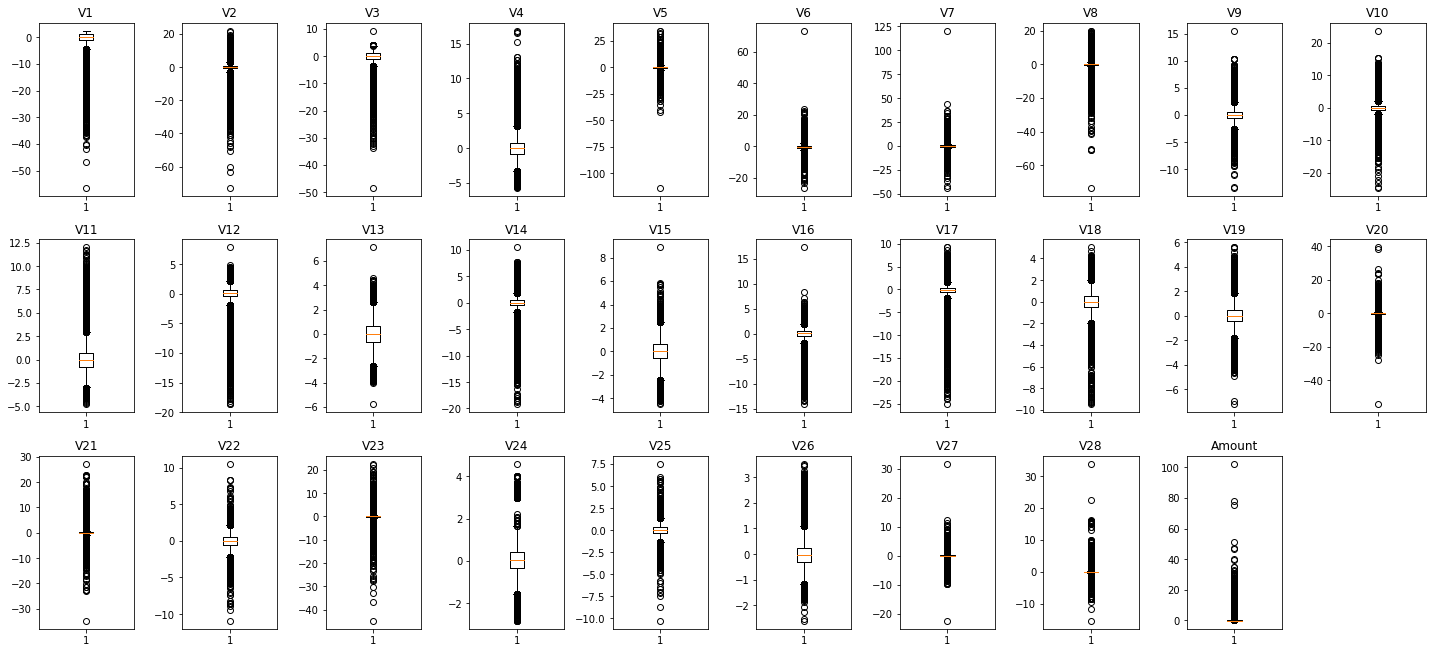

In [ ]:
# outlier detection using boxplot for train dataset
numeric_columns =dataCorrect.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(10, 10, i + 1)
    plt.boxplot(dataCorrect[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)  ## Code to create boxplots for all the numeric columns
plt.show()

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
numerical_col = dataCorrect.select_dtypes(include=np.number).columns.tolist()
dataCorrect = treat_outliers_all(dataCorrect, numerical_col)

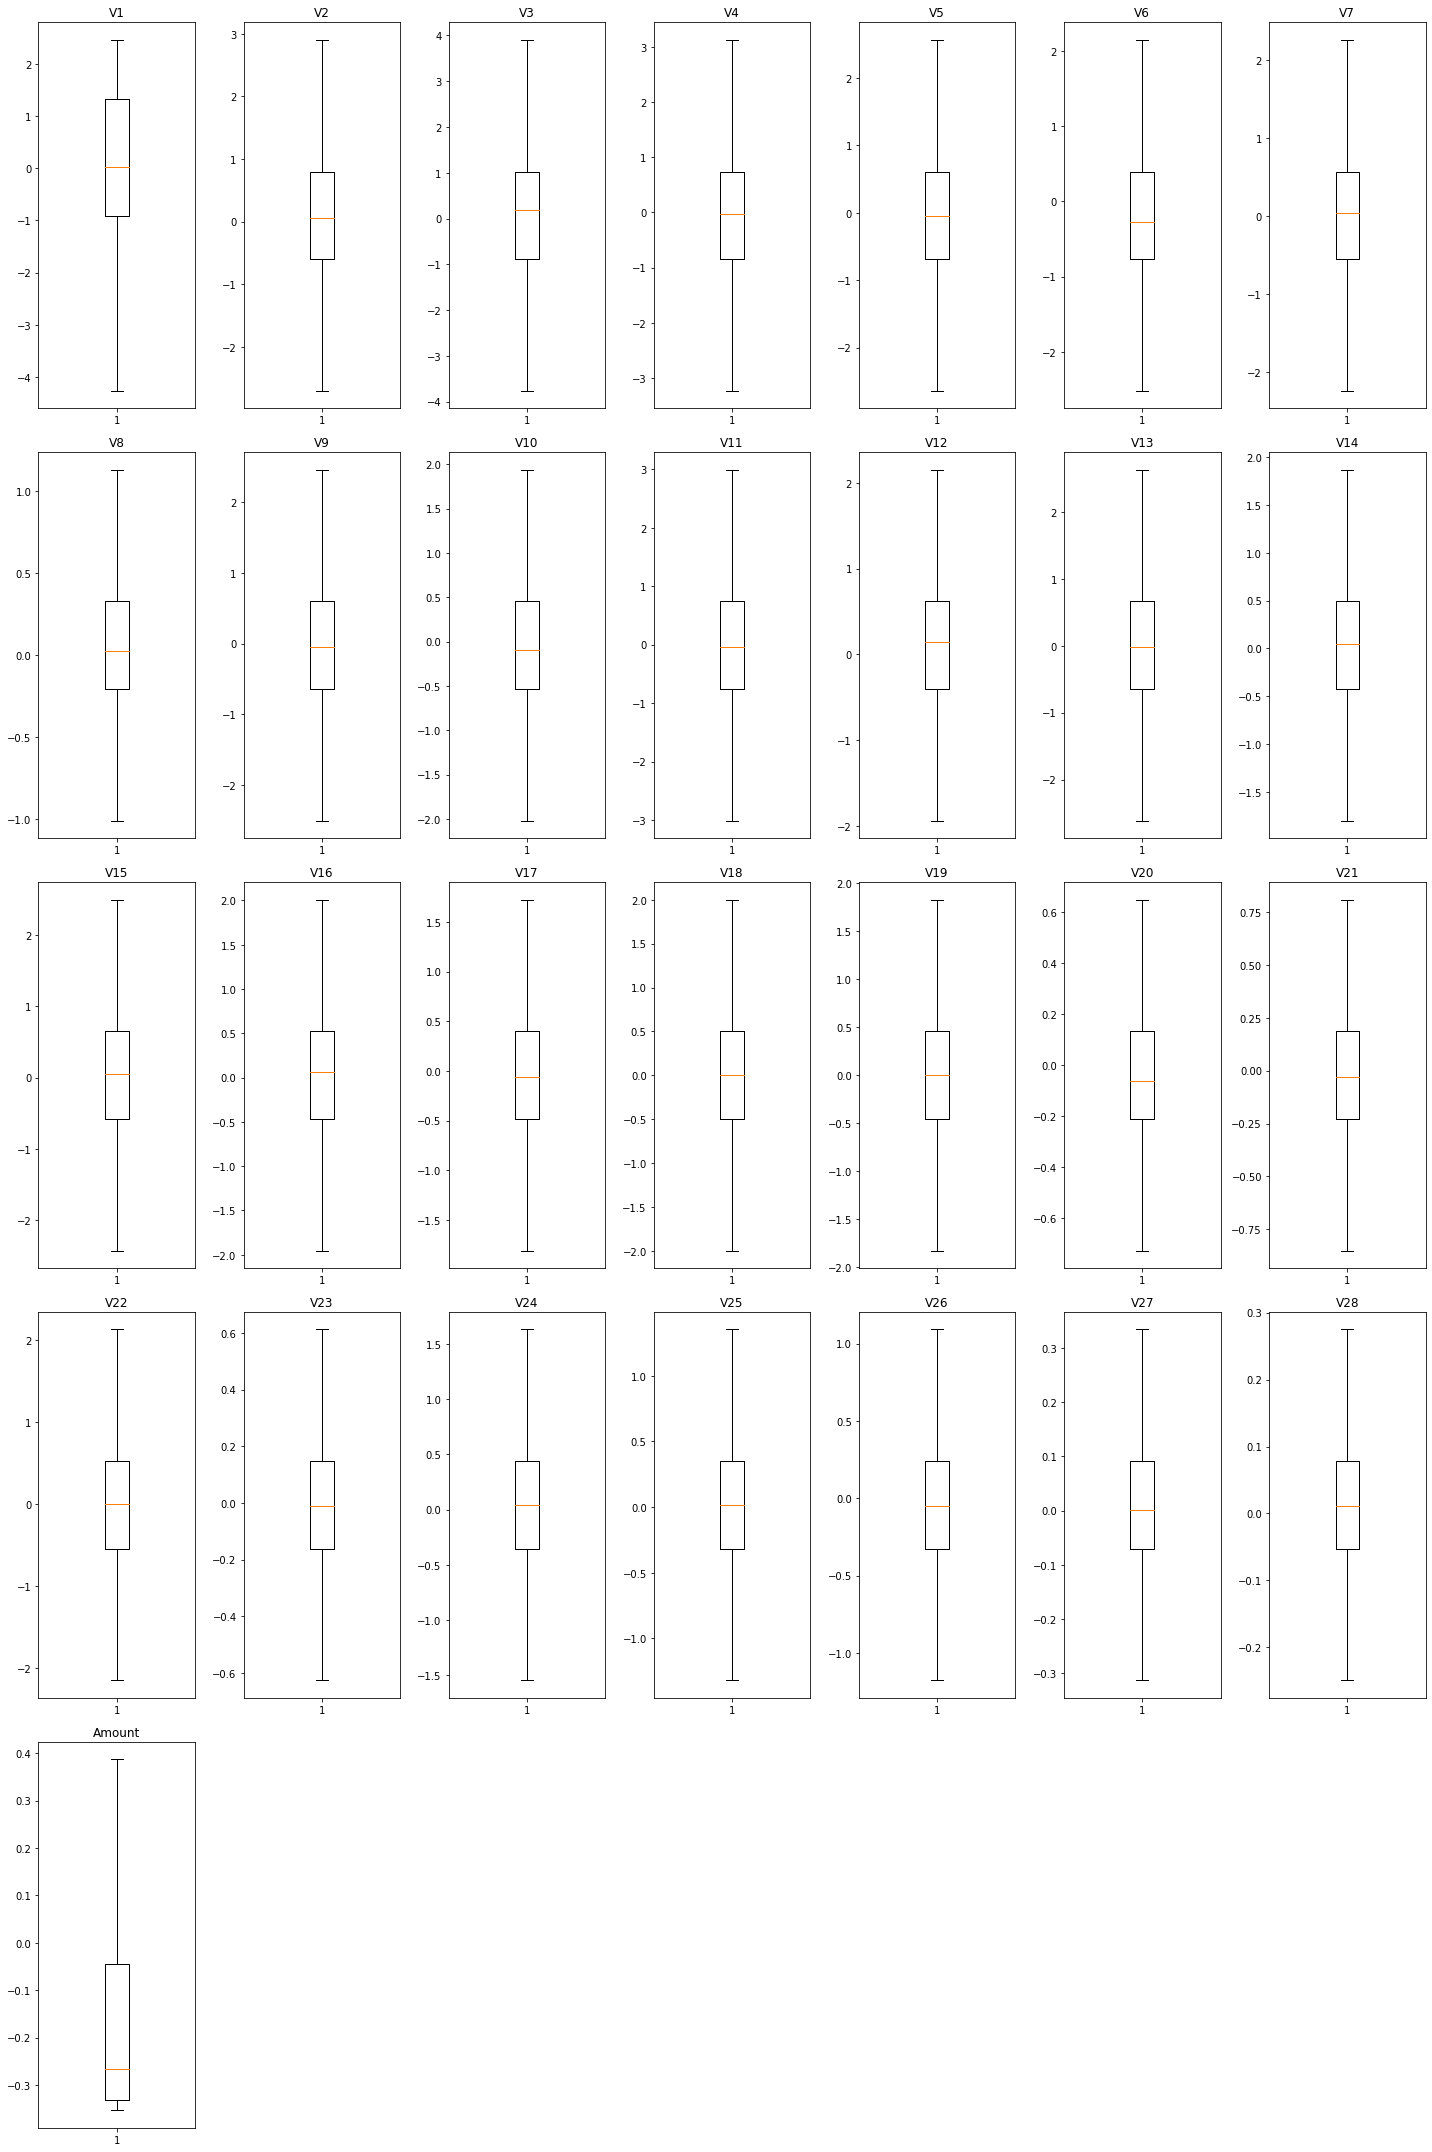

In [ ]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 7, i + 1)
    plt.boxplot(dataCorrect[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
datacat = pd.concat([dataCorrect, dataLabel], axis=1)
datacat.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0.244,0
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,-0.343,0
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-1.952,1.110,-0.121,-1.828,0.525,0.248,0.772,0.612,-0.689,-0.328,-0.139,-0.055,-0.060,0.387,0
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0.140,0
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,-0.074,0


In [ ]:
"""
# scaling the data before analysis
scaler = StandardScaler()
subset = datacat['Amount'].values  ## Complete the code to scale the data
datacat['Amount'] = scaler.fit_transform(subset.reshape(-1, 1))
"""

"\n# scaling the data before analysis\nscaler = StandardScaler()\nsubset = datacat['Amount'].values  ## Complete the code to scale the data\ndatacat['Amount'] = scaler.fit_transform(subset.reshape(-1, 1))\n"

In [ ]:
#Preparing the data to train/test split the dataset
X = datacat.drop(["Class"], axis=1)
y = datacat["Class"]

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

Shape of X: (283726, 29)
Shape of y: (283726,)
(170235, 29) (56745, 29) (56746, 29)


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of validation set : ", X_val.shape)
print("Shape of testing set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (170235, 29)
Shape of validation set :  (56745, 29)
Shape of testing set :  (56746, 29)
Percentage of classes in training set:
0   0.998
1   0.002
Name: Class, dtype: float64
Percentage of classes in validation set:
0   0.998
1   0.002
Name: Class, dtype: float64
Percentage of classes in test set:
0   0.998
1   0.002
Name: Class, dtype: float64


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)
print('X_val', X_val.shape)
print('y_val', y_val.shape)

X_train (170235, 29)
y_train (170235, 2)
X_test (56746, 29)
y_test (56746, 2)
X_val (56745, 29)
y_val (56745, 2)


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
type(y_train)

numpy.ndarray

Oversampling using SMOTE

In [ ]:
# Synthetic Minority Over Sampling Technique (SMOTE)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': [169952    283]
Before OverSampling, counts of label '0': [   283 169952] 

After OverSampling, counts of label '1': [169952]
After OverSampling, counts of label '0': [169952] 

After OverSampling, the shape of train_X: (339904, 29)
After OverSampling, the shape of train_y: (339904, 1) 



In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X_train_over, y_train_over, test_size=0.2, random_state=1, stratify=y_train_over
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(203942, 29) (67981, 29) (67981, 29)


In [ ]:
print('X_train_over', X_train_over.shape)
print('y_train_over', y_train_over.shape)

X_train_over (339904, 29)
y_train_over (339904, 1)


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('y_train', y_train.shape)
print('y_val', y_val.shape)
print('y_test', y_test.shape)

y_train (203942, 2)
y_val (67981, 2)
y_test (67981, 2)


In [ ]:
# VIF dataframe
vif_train = pd.DataFrame()
vif_train["Feature"] = X_train.columns

# calculating VIF for each feature
vif_train["VIF"] = [
    variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))
]

print((vif_train).to_string(index=False))

Feature   VIF
     V1 2.752
     V2 4.405
     V3 4.798
     V4 3.525
     V5 2.827
     V6 2.584
     V7 4.395
     V8 2.132
     V9 3.385
    V10 4.704
    V11 5.184
    V12 3.852
    V13 1.080
    V14 3.888
    V15 1.130
    V16 3.760
    V17 3.382
    V18 2.807
    V19 1.873
    V20 1.490
    V21 2.227
    V22 1.273
    V23 1.450
    V24 1.134
    V25 1.462
    V26 1.099
    V27 2.136
    V28 1.800
 Amount 2.311


In [ ]:
"""
# Converting dataframe to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()
"""

'\n# Converting dataframe to numpy array\nX_train = X_train.to_numpy()\nX_test = X_test.to_numpy()\nX_val = X_val.to_numpy()\n'

In [ ]:
"""
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
"""

'\n# reshape input to be 3D [samples, timesteps, features]\nX_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))\nX_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))\nX_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))\n'

In [ ]:
X_train.shape

(203942, 29)

In [ ]:

#Applying a Neural Network
model = Sequential()
#model.add(Dense(16, input_dim=11, activation='relu', input_shape=(11,)))
model.add(Dense(128, activation='relu', input_shape=(29,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='Softmax'))
"""
# First algorithm:
model = Sequential()
model.add(
    Bidirectional(
        LSTM(30, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])
    )
)
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(30)))
model.add(Dense(2))
# model.add(Activation('softmax'))
model.add(Activation("sigmoid"))
"""


'\n# First algorithm:\nmodel = Sequential()\nmodel.add(\n    Bidirectional(\n        LSTM(30, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])\n    )\n)\nmodel.add(Dropout(0.2))\nmodel.add(Bidirectional(LSTM(30)))\nmodel.add(Dense(2))\n# model.add(Activation(\'softmax\'))\nmodel.add(Activation("sigmoid"))\n'

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               3840      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                      

In [ ]:
#Question 9 AND Question 15
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

#Question 13
#opt = tf.keras.optimizers.SGD(learning_rate=0.001)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
#FOR QUESTION 9
#history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))
#FOR QUESTION 15
#history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test))
#FOR QUESTION 13
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/20
2040/2040 [==============================] - 17s 8ms/step - loss: 0.0284 - accuracy: 0.9896 - val_loss: 0.0119 - val_accuracy: 0.9966
Epoch 2/20
2040/2040 [==============================] - 8s 4ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 3/20
2040/2040 [==============================] - 8s 4ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 4/20
2040/2040 [==============================] - 8s 4ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 5/20
2040/2040 [==============================] - 9s 4ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9988
Epoch 6/20
2040/2040 [==============================] - 8s 4ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0066 - val_accuracy: 0.9984
Epoch 7/20
2040/2040 [==============================] - 9s 4ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0021 - val_accuracy

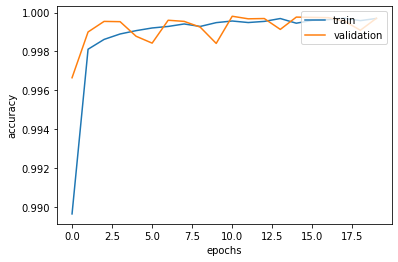

In [ ]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')

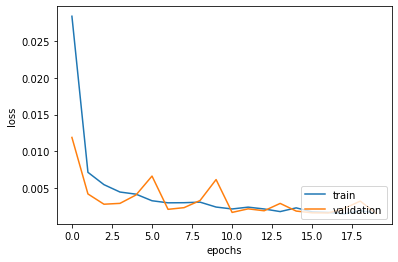

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc = 'lower right')

Training Performance

In [ ]:
Y_pred = model.predict(X_train)

In [ ]:
Y_pred.shape

(203942, 2)

In [ ]:
y_train.shape

(203942, 2)

In [ ]:
label_pred = np.argmax(Y_pred, axis=1)

In [ ]:
label_pred

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
label_train = np.argmax(y_train, axis=1)

In [ ]:
(unique, counts) = np.unique(label_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[     0 101935]
 [     1 102007]]


In [ ]:
label_train

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
(unique, counts) = np.unique(label_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[     0 101971]
 [     1 101971]]


In [ ]:
confusion_matrix(label_train, label_pred)

array([[101935,     36],
       [     0, 101971]])

In [ ]:
precision_score(label_train, label_pred, average="macro")
#Second model with feature "Amount" scaled and feature "Time" dropped
#0.9999558737007257
#2nd run
#0.9998235415216603

0.9998235415216603

In [ ]:
recall_score(label_train, label_pred,  average = 'macro')
#First model
#0.5291957603923283
#Second model with feature "Amount" scaled and feature "Time" dropped
#0.9999558698061213
#2nd run
#0.9998234792244853

0.9998234792244853

In [ ]:
f1_score(label_train, label_pred, average='macro')
#First model
#0.5290408941856531
#Second model with feature "Amount" scaled and feature "Time" dropped
#0.9999558698060353
#2nd run
#0.9998234792189851

0.9998234792189851

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(label_train,label_pred)
print('Classification report: \n',matrix)
#Classification report: 
               #precision    recall  f1-score   support

           #0       0.53      0.51      0.52    102353
           #1       0.53      0.55      0.54    102352

    #accuracy                           0.53    204705
   #macro avg       0.53      0.53      0.53    204705
#weighted avg       0.53      0.53      0.53    204705
#Second model with feature "Amount" scaled and feature "Time" dropped
#Classification report: 
               #precision    recall  f1-score   support

           #0       1.00      1.00      1.00    101971
           #1       1.00      1.00      1.00    101971

    #accuracy                           1.00    203942
   #macro avg       1.00      1.00      1.00    203942
#weighted avg       1.00      1.00      1.00    203942
#2nd run
#Classification report: 
               #precision    recall  f1-score   support

           #0       1.00      1.00      1.00    101971
           #1       1.00      1.00      1.00    101971

    #accuracy                           1.00    203942
   #macro avg       1.00      1.00      1.00    203942
#weighted avg       1.00      1.00      1.00    203942


Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    101971
           1       1.00      1.00      1.00    101971

    accuracy                           1.00    203942
   macro avg       1.00      1.00      1.00    203942
weighted avg       1.00      1.00      1.00    203942



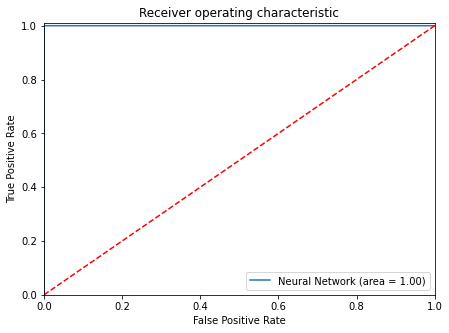

In [ ]:
#ROC_AUC for the train set
NN_roc_auc_test = roc_auc_score(label_train, label_pred)
fpr, tpr, thresholds = roc_curve(label_train, label_pred)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Neural Network (area = %0.2f)" % NN_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Testing Performance

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred.shape

(67981, 2)

In [ ]:
y_test.shape

(67981, 2)

In [ ]:
label_pred = np.argmax(Y_pred, axis=1)

In [ ]:
label_pred

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
label_test = np.argmax(y_test, axis=1)

In [ ]:
(unique, counts) = np.unique(label_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 33964]
 [    1 34017]]


In [ ]:
label_test

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
(unique, counts) = np.unique(label_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 33990]
 [    1 33991]]


In [ ]:
confusion_matrix(label_test, label_pred)

array([[33964,    26],
       [    0, 33991]])

In [ ]:
precision_score(label_test, label_pred, average="macro")
#Second model with feature "Amount" scaled and feature "Time" dropped
#0.9997794506851732
#2nd run
#0.99954441243901

0.9996178381397536

In [ ]:
recall_score(label_test, label_pred,  average = 'macro')
#First Model
#0.5318307051996014
#Second model with feature "Amount" scaled and feature "Time" dropped
#0.9997793468667255
#2nd run
#0.9995439835245661

0.9996175345689908

In [ ]:
f1_score(label_test, label_pred, average='macro')
#First model
#0.5315976701583305
#Second model with feature "Amount" scaled and feature "Time" dropped
#0.9997793501003087
#2nd run
#0.9995439901315236

0.9996175401347238

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(label_test,label_pred)
print('Classification report: \n',matrix)
#Classification report: 
               #precision    recall  f1-score   support

           #0       0.53      0.51      0.52     34118
           #1       0.53      0.55      0.54     34118

    #accuracy                           0.53     68236
   #macro avg       0.53      0.53      0.53     68236
#weighted avg       0.53      0.53      0.53     68236
#Second model with feature "Amount" scaled and feature "Time" dropped
#Classification report: 
               #precision    recall  f1-score   support

           #0       1.00      1.00      1.00     33990
           #1       1.00      1.00      1.00     33991

    #accuracy                           1.00     67981
   #macro avg       1.00      1.00      1.00     67981
#weighted avg       1.00      1.00      1.00     67981
#2nd run
#Classification report: 
               #precision    recall  f1-score   support

           #0       1.00      1.00      1.00     33990
           #1       1.00      1.00      1.00     33991

    #accuracy                           1.00     67981
   #macro avg       1.00      1.00      1.00     67981
#weighted avg       1.00      1.00      1.00     67981


Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33990
           1       1.00      1.00      1.00     33991

    accuracy                           1.00     67981
   macro avg       1.00      1.00      1.00     67981
weighted avg       1.00      1.00      1.00     67981



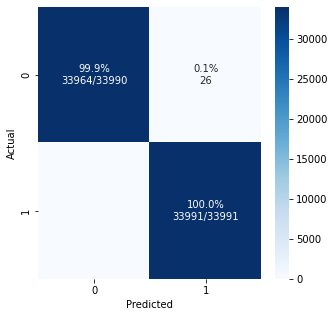

In [ ]:
# Different confusion matrix plot with percentages
def plot_cm(label_test, label_pred, figsize=(5, 5)):
    cm = confusion_matrix(label_test, label_pred, labels=np.unique(label_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = "%.1f%%\n%d/%d" % (p, c, s)
            elif c == 0:
                annot[i, j] = ""
            else:
                annot[i, j] = "%.1f%%\n%d" % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(label_test), columns=np.unique(label_test))
    cm.index.name = "Actual"
    cm.columns.name = "Predicted"
    fig, ax = plt.subplots(figsize=figsize)
    # sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    sns.heatmap(cm, cmap="Blues", annot=annot, fmt="", ax=ax)
plot_cm(label_test, label_pred)

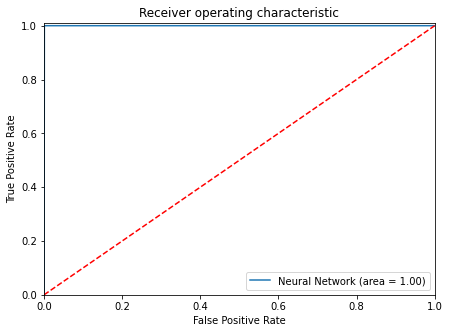

In [ ]:
#ROC_AUC for the train set
NN_roc_auc_test = roc_auc_score(label_test, label_pred)
fpr, tpr, thresholds = roc_curve(label_test, label_pred)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Neural Network (area = %0.2f)" % NN_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Undersampling using RandomUnderSampler

In [ ]:
#Undersampling
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': [101971 101971]
Before UnderSampling, counts of label '0': [101971 101971] 

After UnderSampling, counts of label '1': [101971]
After UnderSampling, counts of label '0': [101971] 

After UnderSampling, the shape of train_X: (203942, 29)
After UnderSampling, the shape of train_y: (203942, 1) 



In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X_train_un, y_train_un, test_size=0.2, random_state=1, stratify=y_train_un
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(122364, 29) (40789, 29) (40789, 29)


In [ ]:
print('X_train_un', X_train_un.shape)
print('y_train_un', y_train_un.shape)

X_train_un (203942, 29)
y_train_un (203942, 1)


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('y_train', y_train.shape)
print('y_val', y_val.shape)
print('y_test', y_test.shape)

y_train (122364, 2)
y_val (40789, 2)
y_test (40789, 2)


In [ ]:
"""
# Converting dataframe to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()
"""

'\n# Converting dataframe to numpy array\nX_train = X_train.to_numpy()\nX_test = X_test.to_numpy()\nX_val = X_val.to_numpy()\n'

In [ ]:
"""
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
"""

'\n# reshape input to be 3D [samples, timesteps, features]\nX_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))\nX_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))\nX_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))\n'

In [ ]:
X_train.shape

(122364, 29)

In [ ]:
#Applying a Neural Network
model = Sequential()
#model.add(Dense(16, input_dim=11, activation='relu', input_shape=(11,)))
model.add(Dense(128, activation='relu', input_shape=(29,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='Softmax'))
"""
# First algorithm:
model = Sequential()
model.add(
    Bidirectional(
        LSTM(30, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])
    )
)
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(30)))
model.add(Dense(2))
# model.add(Activation('softmax'))
model.add(Activation("sigmoid"))
"""


'\n# First algorithm:\nmodel = Sequential()\nmodel.add(\n    Bidirectional(\n        LSTM(30, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])\n    )\n)\nmodel.add(Dropout(0.2))\nmodel.add(Bidirectional(LSTM(30)))\nmodel.add(Dense(2))\n# model.add(Activation(\'softmax\'))\nmodel.add(Activation("sigmoid"))\n'

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               3840      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                      

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/20
1224/1224 [==============================] - 10s 8ms/step - loss: 0.0395 - accuracy: 0.9854 - val_loss: 0.0067 - val_accuracy: 0.9984
Epoch 2/20
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0117 - val_accuracy: 0.9960
Epoch 3/20
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0051 - val_accuracy: 0.9989
Epoch 4/20
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0047 - val_accuracy: 0.9990
Epoch 5/20
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 6/20
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 7/20
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0055 - val_accuracy

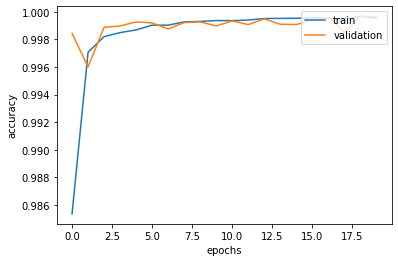

In [ ]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')

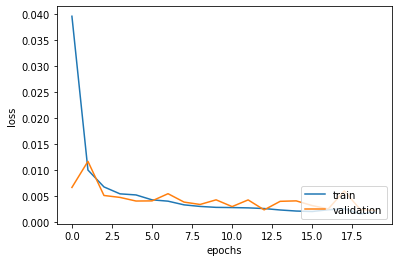

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc = 'lower right')

Training performance

In [ ]:
Y_pred = model.predict(X_train)

In [ ]:
Y_pred.shape

(122364, 2)

In [ ]:
y_train.shape

(122364, 2)

In [ ]:
label_pred = np.argmax(Y_pred, axis=1)

In [ ]:
label_train = np.argmax(y_train, axis=1)

In [ ]:
label_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
(unique, counts) = np.unique(label_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 61161]
 [    1 61203]]


In [ ]:
label_train

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
(unique, counts) = np.unique(label_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 61182]
 [    1 61182]]


In [ ]:
confusion_matrix(label_train, label_pred)

array([[61161,    21],
       [    0, 61182]])

In [ ]:
precision_score(label_train, label_pred, average="macro")

0.9998284397823636

In [ ]:
recall_score(label_train, label_pred, average="macro")

0.9998283808963421

In [ ]:
f1_score(label_train, label_pred, average="macro")

0.9998283808912873

In [ ]:
matrix = classification_report(label_train, label_pred)
print("Classification report: \n", matrix)

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     61182
           1       1.00      1.00      1.00     61182

    accuracy                           1.00    122364
   macro avg       1.00      1.00      1.00    122364
weighted avg       1.00      1.00      1.00    122364



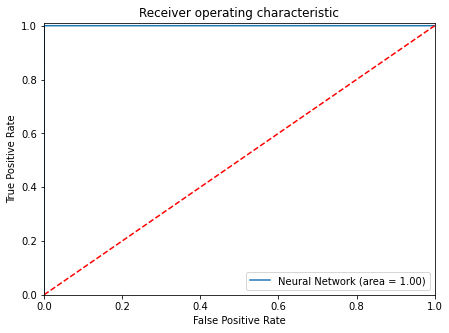

In [ ]:
#ROC_AUC for the train set
NN_roc_auc_test = roc_auc_score(label_train, label_pred)
fpr, tpr, thresholds = roc_curve(label_train, label_pred)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Neural Network (area = %0.2f)" % NN_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Testing performance

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred.shape

(40789, 2)

In [ ]:
y_test.shape

(40789, 2)

In [ ]:
label_pred = np.argmax(Y_pred, axis=1)

In [ ]:
label_test = np.argmax(y_test, axis=1)

In [ ]:
label_pred

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
(unique, counts) = np.unique(label_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 20372]
 [    1 20417]]


In [ ]:
label_test

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
(unique, counts) = np.unique(label_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 20394]
 [    1 20395]]


In [ ]:
confusion_matrix(label_test, label_pred)

array([[20372,    22],
       [    0, 20395]])

In [ ]:
precision_score(label_test, label_pred, average="macro")

0.9994612332859871

In [ ]:
recall_score(label_test, label_pred, average="macro")

0.9994606256742179

In [ ]:
f1_score(label_test, label_pred, average="macro")

0.9994606387262479

In [ ]:
matrix = classification_report(label_test, label_pred)
print("Classification report: \n", matrix)
# 1st run

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20394
           1       1.00      1.00      1.00     20395

    accuracy                           1.00     40789
   macro avg       1.00      1.00      1.00     40789
weighted avg       1.00      1.00      1.00     40789



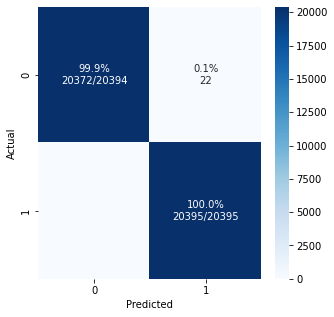

In [ ]:
# Different confusion matrix plot with percentages
def plot_cm(label_test, label_pred, figsize=(5, 5)):
    cm = confusion_matrix(label_test, label_pred, labels=np.unique(label_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = "%.1f%%\n%d/%d" % (p, c, s)
            elif c == 0:
                annot[i, j] = ""
            else:
                annot[i, j] = "%.1f%%\n%d" % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(label_test), columns=np.unique(label_test))
    cm.index.name = "Actual"
    cm.columns.name = "Predicted"
    fig, ax = plt.subplots(figsize=figsize)
    # sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    sns.heatmap(cm, cmap="Blues", annot=annot, fmt="", ax=ax)
plot_cm(label_test, label_pred)

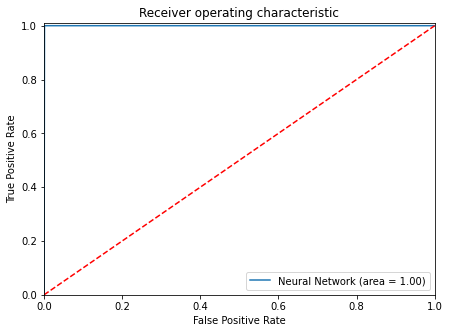

In [ ]:
#ROC_AUC for the train set
NN_roc_auc_test = roc_auc_score(label_test, label_pred)
fpr, tpr, thresholds = roc_curve(label_test, label_pred)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Neural Network (area = %0.2f)" % NN_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()